In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from main import get_parser, show_all_variables
import tensorflow as tf
from UGATIT import UGATIT
from PIL import Image
from IPython.display import Image 

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [3]:
parser = get_parser()
args = parser.parse_args("--phase test".split())


##### Information #####
# light :  False
# gan type :  lsgan
# dataset :  selfie2anime
# max dataset number :  0
# batch_size :  1
# epoch :  100
# iteration per epoch :  10000
# smoothing :  True

##### Generator #####
# residual blocks :  4

##### Discriminator #####
# discriminator layer :  6
# the number of critic :  1
# spectral normalization :  True

##### Weight #####
# adv_weight :  1
# cycle_weight :  10
# identity_weight :  10
# cam_weight :  1000


Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.flatten instead.

Instructions for updating:
Use keras.layers.Dense instead.



 [*] Reading checkpoints...
INFO:tensorflow:Restoring parameters from checkpoint/UGATIT_selfie2anime_lsgan_4resblock_6dis_1_1_10_10_1000_sn_smoothing/UGATIT.model-2044000
 [*] Success to read UGATIT.model-2044000
 [*] Load SUCCESS


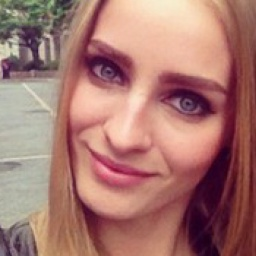

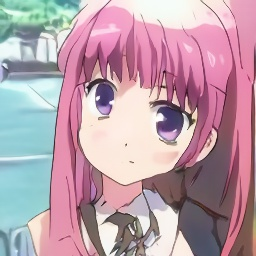

In [5]:
with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
    #sess.reuse_variables()  
    gan = UGATIT(sess, args)

    # build graph
    gan.build_model()

    picture = "./data/woman.jpg"
    
    img  = gan.infer(picture)
    
    original = Image(filename=picture)
    anime = Image(filename=img)
    
    display(original, anime)